In [84]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('./nypd-motor-vehicle-collisions.csv')

/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_86052/571042000.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./nypd-motor-vehicle-collisions.csv')


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ACCIDENT DATE                  1612178 non-null  object 
 1   ACCIDENT TIME                  1612178 non-null  object 
 2   BOROUGH                        1127553 non-null  object 
 3   ZIP CODE                       1127376 non-null  object 
 4   LATITUDE                       1415893 non-null  float64
 5   LONGITUDE                      1415893 non-null  float64
 6   LOCATION                       1415893 non-null  object 
 7   ON STREET NAME                 1298002 non-null  object 
 8   CROSS STREET NAME              1079193 non-null  object 
 9   OFF STREET NAME                219732 non-null   object 
 10  NUMBER OF PERSONS INJURED      1612161 non-null  float64
 11  NUMBER OF PERSONS KILLED       1612145 non-null  float64
 12  NUMBER OF PEDE

In [55]:
df.head()

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN


In [56]:
vehicle_type = df[df['NUMBER OF PERSONS INJURED']>=1]['VEHICLE TYPE CODE 1'].value_counts()

In [57]:
vehicle_type.head(50)

VEHICLE TYPE CODE 1
PASSENGER VEHICLE                      132221
SPORT UTILITY / STATION WAGON           58657
Sedan                                   31572
Station Wagon/Sport Utility Vehicle     24686
TAXI                                    10830
UNKNOWN                                  7030
BICYCLE                                  4317
VAN                                      4188
Taxi                                     3597
OTHER                                    3484
MOTORCYCLE                               3475
Bike                                     3284
PICK-UP TRUCK                            3214
LIVERY VEHICLE                           2524
BUS                                      2156
Pick-up Truck                            1595
SMALL COM VEH(4 TIRES)                   1488
LARGE COM VEH(6 OR MORE TIRES)           1370
Bus                                      1253
Motorcycle                               1018
Box Truck                                 775
Van           

In [58]:
df.value_counts(['CONTRIBUTING FACTOR VEHICLE 1']).head(50)


CONTRIBUTING FACTOR VEHICLE 1                        
Unspecified                                              595805
Driver Inattention/Distraction                           299425
Failure to Yield Right-of-Way                             91617
Following Too Closely                                     78467
Backing Unsafely                                          61445
Other Vehicular                                           51200
Fatigued/Drowsy                                           48593
Turning Improperly                                        41448
Passing or Lane Usage Improper                            37398
Passing Too Closely                                       34194
Unsafe Lane Changing                                      30110
Traffic Control Disregarded                               24495
Driver Inexperience                                       23468
Lost Consciousness                                        20064
Prescription Medication                           

In [70]:
vehicle_types_of_interest = ['BICYCLE', 'MOTORCYCLE', 'Bike', 'Motorcycle', 'SCOOTER', 'Motorscooter', 'E-Sco', 'E-Bik']

In [72]:
mask = df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].isin(vehicle_types_of_interest).any(axis=1)

In [78]:
filtered_df = df[mask]

In [80]:
filtered_df['ACCIDENT DATE'] = pd.to_datetime(filtered_df['ACCIDENT DATE'])


/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_86052/4026082479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ACCIDENT DATE'] = pd.to_datetime(filtered_df['ACCIDENT DATE'])


In [82]:
monthly_accidents = filtered_df.groupby(filtered_df['ACCIDENT DATE'].dt.to_period('M')).size()


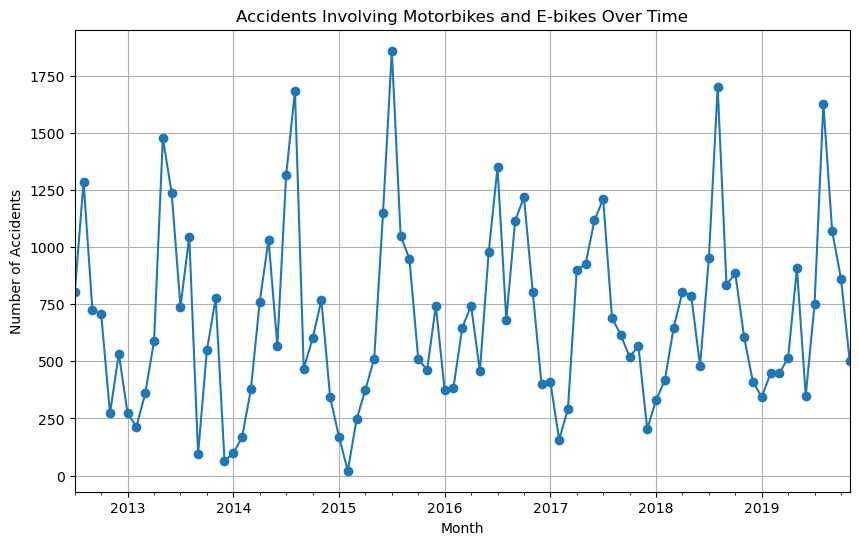

In [86]:
monthly_accidents.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Accidents Involving Motorbikes and E-bikes Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

In [100]:
df['ACCIDENT DATE'] = pd.to_datetime(df['ACCIDENT DATE'])

In [102]:
df_grouped = df.groupby(df['ACCIDENT DATE'].dt.to_period('Y')).agg({
    'NUMBER OF PERSONS KILLED': 'sum',
    'NUMBER OF PEDESTRIANS KILLED': 'sum',
    'NUMBER OF CYCLIST KILLED': 'sum',
    'NUMBER OF MOTORIST KILLED': 'sum'
}).reset_index()

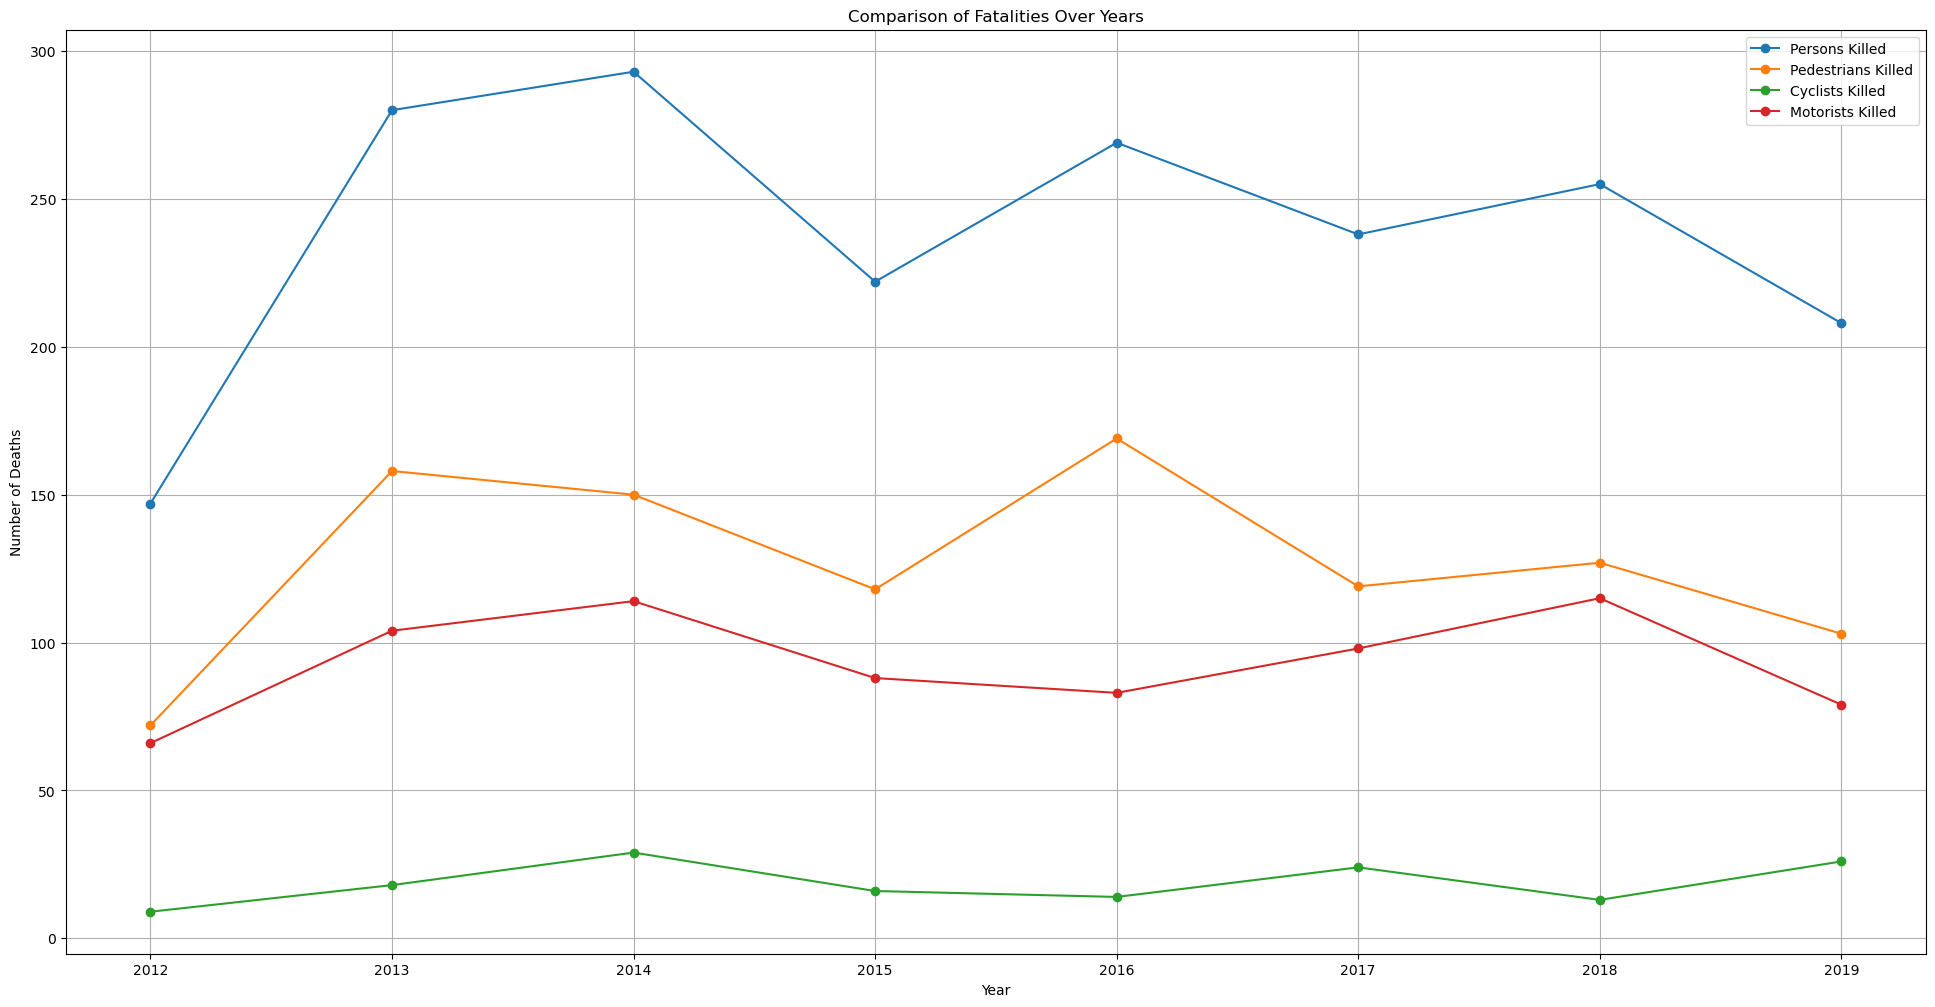

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))

plt.plot(df_grouped['ACCIDENT DATE'].astype(str), df_grouped['NUMBER OF PERSONS KILLED'], label='Persons Killed', marker='o')
plt.plot(df_grouped['ACCIDENT DATE'].astype(str), df_grouped['NUMBER OF PEDESTRIANS KILLED'], label='Pedestrians Killed', marker='o')
plt.plot(df_grouped['ACCIDENT DATE'].astype(str), df_grouped['NUMBER OF CYCLIST KILLED'], label='Cyclists Killed', marker='o')
plt.plot(df_grouped['ACCIDENT DATE'].astype(str), df_grouped['NUMBER OF MOTORIST KILLED'], label='Motorists Killed', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Comparison of Fatalities Over Years')
plt.legend()
plt.grid(True)
plt.show()